In [66]:
%pylab inline
import pandas as pd
import requests
from pprint import pprint

Populating the interactive namespace from numpy and matplotlib


/home/mhelf/.local/share/virtualenvs/helpernb-uRpGV3Tr/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['get']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Config

In [2]:
api = 'http://localhost:3000/api'

# Helpers

In [59]:
def get(endpoint):
    res = requests.get(f'{api}/{endpoint}')
    return res.json()

In [60]:
def post(endpoint, **kwargs):
    res = requests.post(f'{api}/{endpoint}', json=kwargs)
    res.raise_for_status()
    return res.json()

In [61]:
get('info')

{'version': '0.6.8'}

In [62]:
post('scansets')

{'datasets': [{'exchange': 'kraken',
   'currency': 'EUR',
   'asset': 'ETH',
   'ranges': [{'from': 1451608440, 'to': 1562866260}]},
  {'exchange': 'poloniex', 'currency': 'BTC', 'asset': 'HOT', 'ranges': []},
  {'exchange': 'binance',
   'currency': 'USDT',
   'asset': 'ETH',
   'ranges': [{'from': 1502942400, 'to': 1561572780}]},
  {'exchange': 'binance',
   'currency': 'ETH',
   'asset': 'HOT',
   'ranges': [{'from': 1532404800, 'to': 1562867040}]},
  {'exchange': 'binance',
   'currency': 'USDT',
   'asset': 'BTC',
   'ranges': [{'from': 1502942400, 'to': 1561664040}]},
  {'exchange': 'bitfinex',
   'currency': 'EUR',
   'asset': 'NEO',
   'ranges': [{'from': 1522339200, 'to': 1543218420}]},
  {'exchange': 'bitfinex',
   'currency': 'EUR',
   'asset': 'EOS',
   'ranges': [{'from': 1522339860, 'to': 1543215720}]},
  {'exchange': 'bitfinex',
   'currency': 'EUR',
   'asset': 'ETH',
   'ranges': [{'from': 1522338180, 'to': 1543219020}]},
  {'exchange': 'bitfinex',
   'currency': 'EUR

In [282]:
bt_config = {
    "watch": {
        "exchange": "kraken",
        "currency": "EUR",
        "asset": "ETH"
    },
    "paperTrader": {
        "feeMaker": 0.25,
        "feeTaker": 0.25,
        "feeUsing": "maker",
        "slippage": 0.05,
        "simulationBalance": {
            "asset": 1,
            "currency": 100
        },
        "reportRoundtrips": True,
        "enabled": True
    },
    "tradingAdvisor": {
        "enabled": True,
        "method": "YANT",
        "candleSize": 120,
        "historySize": 200
    },
    "YANT": {
      "emaPeriod": 42,
      "atrPeriod": 10,
      "candleSize": 120,
      "historySize": 200,
      "enterPeriods": 16,
      "exitDonchian": 31,
      "entryDonchian": 76,
      "exitAtrFactor": 0,
      "exitPersistency": 3
    },
    "backtest": {
        "daterange": {
            "from": "2016-01-01T00:00:00Z",
            "to": "2019-07-10T00:00:00Z"
        }
    },
    "backtestResultExporter": {
        "enabled": True,
        "writeToDisk": False,
        "data": {
            "stratUpdates": True,
            "roundtrips": True,
            "stratCandles": True,
            "stratCandleProps": [
                "open", "high", "low", "close", 
            ],
            "trades": True
        }
    },
    "performanceAnalyzer": {
        "riskFreeReturn": 2,
        "enabled": True
    }
}

In [283]:
res = post('backtest', **bt_config)

In [284]:
roundtrips = pd.DataFrame(res['roundtrips'])
roundtrips.entryAt = pd.to_datetime(roundtrips.entryAt, unit='s')
roundtrips.exitAt = pd.to_datetime(roundtrips.exitAt, unit='s')

candles = pd.DataFrame(res['stratCandles']).set_index('start')
indicators = pd.DataFrame(res['stratUpdates']).set_index('date')
trades = pd.DataFrame(res['trades']).set_index('date')

candles.index = pd.to_datetime(candles.index, unit='s')
indicators.index = pd.to_datetime(indicators.index, unit='s')
trades.index = pd.to_datetime(trades.index, unit='s')

In [285]:
roundtrips.head()

,duration,entryAt,entryBalance,entryPrice,exitAt,exitBalance,exitPrice,id,pnl,profit
0,172800000,2016-01-01 02:34:00,100.603530,0.85353,2016-01-03 02:34:00,100.642426,0.85600,0,0.038896,0.038663
1,115200000,2016-01-03 10:34:00,100.390820,0.88347,2016-01-04 18:34:00,98.611908,0.86999,1,-1.778912,-1.771987
2,1936800000,2016-01-09 00:34:00,98.365378,0.90619,2016-01-31 10:34:00,247.553528,2.28630,2,149.188150,151.667338
3,532800000,2016-02-07 16:34:00,246.934644,2.46512,2016-02-13 20:34:00,414.671239,4.14999,3,167.736594,67.927526
4,1202400000,2016-02-22 20:34:00,413.634561,4.73061,2016-03-07 18:34:00,806.778489,9.25000,4,393.143928,95.046199


In [286]:
candles.head()

,close,high,low,open
start,,,,
2016-01-01 00:34:00,0.85353,0.85353,0.85353,0.85353
2016-01-01 02:34:00,0.85353,0.85353,0.85353,0.85353
2016-01-01 04:34:00,0.87127,0.87127,0.85353,0.85353
2016-01-01 06:34:00,0.87100,0.87127,0.87100,0.87127
2016-01-01 08:34:00,0.87000,0.87100,0.87000,0.87100


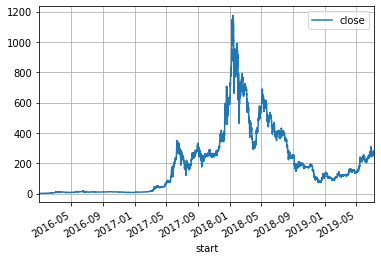

In [287]:
candles.close.plot()
plt.grid()
plt.legend();

In [288]:
indicators = pd.concat([indicators, indicators.indicators.apply(pd.Series)], axis=1).drop('indicators', axis=1)
indicators.columns = [f"ind_{c}" for c in indicators.columns]
indicators.head()

,ind_ema,ind_atr,ind_donchian_exit,ind_donchian_entry
date,,,,
2016-01-01 00:34:00,0.853530,0.0,0.85353,0.85353
2016-01-01 02:34:00,0.853530,0.0,0.85353,0.85353
2016-01-01 04:34:00,0.854355,0.0,0.85353,0.87127
2016-01-01 06:34:00,0.855129,0.0,0.85353,0.87127
2016-01-01 08:34:00,0.855821,0.0,0.85353,0.87127


In [289]:
trades.head()

,action,adviceId,amount,balance,cost,effectivePrice,feePercent,id,portfolio,price
date,,,,,,,,,,
2016-01-01 02:34:00,buy,advice-1,117.867597,100.603530,0.250000,0.851396,0.25,trade-1,"{'asset': 347.01621643, 'currency': 0}",0.85353
2016-01-03 02:34:00,sell,advice-2,117.572928,100.642426,0.252237,0.853860,0.25,trade-2,"{'asset': 347.01621643, 'currency': 0}",0.85600
2016-01-03 10:34:00,buy,advice-3,113.632404,100.390820,0.251606,0.881261,0.25,trade-3,"{'asset': 347.01621643, 'currency': 0}",0.88347
2016-01-04 18:34:00,sell,advice-4,113.348323,98.611908,0.247148,0.867815,0.25,trade-4,"{'asset': 347.01621643, 'currency': 0}",0.86999
2016-01-09 00:34:00,buy,advice-5,108.548293,98.365378,0.246530,0.903925,0.25,trade-5,"{'asset': 347.01621643, 'currency': 0}",0.90619


In [290]:
report = res['performanceReport']
report


{'startTime': '2016-01-01 02:33:00',
 'endTime': '2019-07-10 00:01:00',
 'timespan': '4 years',
 'market': 32112.107365880518,
 'balance': 95408.6385452642,
 'profit': 95307.7850152642,
 'relativeProfit': 94501.18901665039,
 'yearlyProfit': 27071.004015012353,
 'relativeYearlyProfit': 26841.900343014622,
 'startPrice': 0.85353,
 'endPrice': 274.94,
 'trades': 215,
 'startBalance': 100.85353,
 'exposure': 0.3612271613792388,
 'sharpe': 1081.7332534519521,
 'downside': -4.901055955636327,
 'alpha': 63195.67764938369}

In [291]:
jdf = (
    candles
    .join(indicators)
    .join(trades)
    .join(roundtrips.set_index('entryAt')[['entryBalance']])
    .join(roundtrips.set_index('exitAt')[['exitBalance']])
)
jdf.head()

,close,high,low,open,ind_ema,ind_atr,ind_donchian_exit,ind_donchian_entry,action,adviceId,amount,balance,cost,effectivePrice,feePercent,id,portfolio,price,entryBalance,exitBalance
start,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:34:00,0.85353,0.85353,0.85353,0.85353,0.853530,0.0,0.85353,0.85353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 02:34:00,0.85353,0.85353,0.85353,0.85353,0.853530,0.0,0.85353,0.85353,buy,advice-1,117.867597,100.60353,0.25,0.851396,0.25,trade-1,"{'asset': 347.01621643, 'currency': 0}",0.85353,100.60353,NaN
2016-01-01 04:34:00,0.87127,0.87127,0.85353,0.85353,0.854355,0.0,0.85353,0.87127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 06:34:00,0.87100,0.87127,0.87100,0.87127,0.855129,0.0,0.85353,0.87127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 08:34:00,0.87000,0.87100,0.87000,0.87100,0.855821,0.0,0.85353,0.87127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
startBalance = report['startBalance']
startPrice = candles['close'].iloc[0]

In [293]:
jdf['lastAction'] = jdf.action.ffill()
jdf['lastAmount'] = jdf.amount.ffill()
jdf['lastBalance'] = jdf.balance.ffill()
jdf['currentBalance'] = jdf.apply(lambda row: row['lastBalance'] if row['lastAction'] == 'sell' else row['lastAmount'] * row['open'], axis=1).fillna(report['startBalance'])
jdf['marketP'] = jdf.close / startPrice
jdf['stratP'] = jdf.currentBalance / startBalance
jdf['marketMax'] = jdf.marketP.cummax()
jdf['stratMax'] = jdf.stratP.cummax()
jdf['marketDownside'] = -(1 - jdf.marketP / jdf.marketMax)
jdf['stratDownside'] = -(1 - jdf.stratP / jdf.stratMax)
jdf['date'] = jdf.index
jdf.head()

,close,high,low,open,ind_ema,ind_atr,ind_donchian_exit,ind_donchian_entry,action,adviceId,...,lastAmount,lastBalance,currentBalance,marketP,stratP,marketMax,stratMax,marketDownside,stratDownside,date
start,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:34:00,0.85353,0.85353,0.85353,0.85353,0.853530,0.0,0.85353,0.85353,NaN,NaN,...,NaN,NaN,100.853530,1.000000,1.000000,1.000000,1.000000,-0.000000,-0.000000,2016-01-01 00:34:00
2016-01-01 02:34:00,0.85353,0.85353,0.85353,0.85353,0.853530,0.0,0.85353,0.85353,buy,advice-1,...,117.867597,100.60353,100.603530,1.000000,0.997521,1.000000,1.000000,-0.000000,-0.002479,2016-01-01 02:34:00
2016-01-01 04:34:00,0.87127,0.87127,0.85353,0.85353,0.854355,0.0,0.85353,0.87127,NaN,NaN,...,117.867597,100.60353,100.603530,1.020784,0.997521,1.020784,1.000000,-0.000000,-0.002479,2016-01-01 04:34:00
2016-01-01 06:34:00,0.87100,0.87127,0.87100,0.87127,0.855129,0.0,0.85353,0.87127,NaN,NaN,...,117.867597,100.60353,102.694501,1.020468,1.018254,1.020784,1.018254,-0.000310,-0.000000,2016-01-01 06:34:00
2016-01-01 08:34:00,0.87000,0.87100,0.87000,0.87100,0.855821,0.0,0.85353,0.87127,NaN,NaN,...,117.867597,100.60353,102.662677,1.019296,1.017938,1.020784,1.018254,-0.001458,-0.000310,2016-01-01 08:34:00


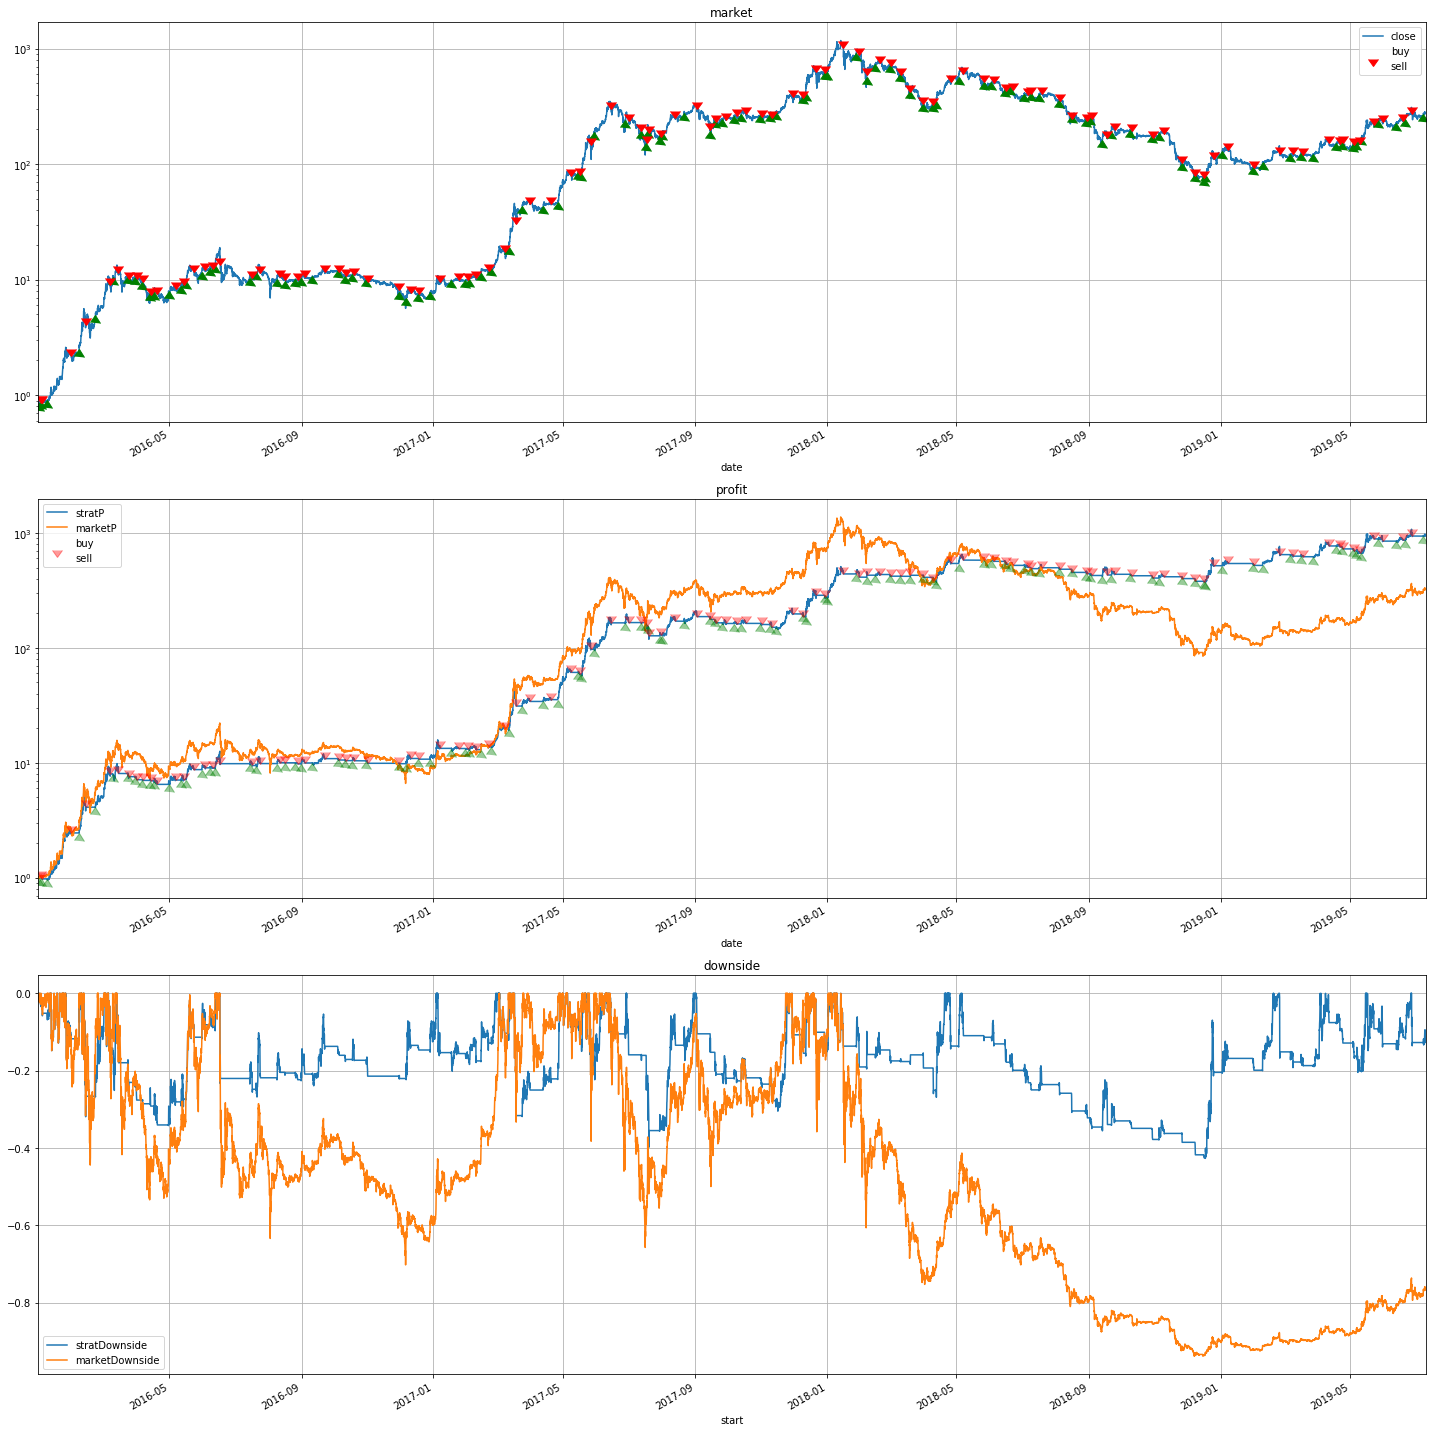

In [294]:
def plotStats(jdf):
#     plt.figure()
    fig, axes = plt.subplots(3,1, figsize=(20,20))
    axidx = 0
    alpha = .4
    
    ax = axes[0]
    jdf[['close']].plot(ax=ax)
#     (jdf[[c for c in jdf.columns if c.startswith('ind_')]]).plot(ax=ax)  # indicators
    jdf[jdf.action == 'buy'].plot(x='date', y='close',  ls='', marker=matplotlib.markers.CARETUP, ax=ax, ms=10, color='green', label='buy')
    jdf[jdf.action == 'sell'].plot(x='date', y='close', ls='', marker=matplotlib.markers.CARETDOWN, ax=ax, ms=10, color='red', label='sell')
    ax.set_yscale('log')
    ax.set_title('market')
    ax.grid()

    axidx += 1
    ax = axes[axidx]
    jdf[['stratP', 'marketP']].plot(ax=ax)
    jdf[jdf.action == 'buy'].plot(x='date', y='stratP',  ls='', marker=matplotlib.markers.CARETUP, ax=ax, ms=10, color='green', label='buy', alpha=alpha)
    jdf[jdf.action == 'sell'].plot(x='date', y='stratP', ls='', marker=matplotlib.markers.CARETDOWN, ax=ax, ms=10, color='red', label='sell', alpha=alpha)
    ax.set_yscale('log')
    ax.set_title('profit')
    ax.grid()

    axidx += 1
    ax = axes[axidx]
    jdf[['stratDownside', 'marketDownside']].plot(ax=ax)
    ax.set_title('downside')
    ax.grid()
    plt.tight_layout()


plotStats(jdf);

In [295]:
jdf.head()

,close,high,low,open,ind_ema,ind_atr,ind_donchian_exit,ind_donchian_entry,action,adviceId,...,lastAmount,lastBalance,currentBalance,marketP,stratP,marketMax,stratMax,marketDownside,stratDownside,date
start,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:34:00,0.85353,0.85353,0.85353,0.85353,0.853530,0.0,0.85353,0.85353,NaN,NaN,...,NaN,NaN,100.853530,1.000000,1.000000,1.000000,1.000000,-0.000000,-0.000000,2016-01-01 00:34:00
2016-01-01 02:34:00,0.85353,0.85353,0.85353,0.85353,0.853530,0.0,0.85353,0.85353,buy,advice-1,...,117.867597,100.60353,100.603530,1.000000,0.997521,1.000000,1.000000,-0.000000,-0.002479,2016-01-01 02:34:00
2016-01-01 04:34:00,0.87127,0.87127,0.85353,0.85353,0.854355,0.0,0.85353,0.87127,NaN,NaN,...,117.867597,100.60353,100.603530,1.020784,0.997521,1.020784,1.000000,-0.000000,-0.002479,2016-01-01 04:34:00
2016-01-01 06:34:00,0.87100,0.87127,0.87100,0.87127,0.855129,0.0,0.85353,0.87127,NaN,NaN,...,117.867597,100.60353,102.694501,1.020468,1.018254,1.020784,1.018254,-0.000310,-0.000000,2016-01-01 06:34:00
2016-01-01 08:34:00,0.87000,0.87100,0.87000,0.87100,0.855821,0.0,0.85353,0.87127,NaN,NaN,...,117.867597,100.60353,102.662677,1.019296,1.017938,1.020784,1.018254,-0.001458,-0.000310,2016-01-01 08:34:00


In [296]:
def first(df):
    return df.iloc[0,:]
def last(df):
    return df.iloc[-1,:]

groups = jdf[['currentBalance', 'close']].groupby(pd.Grouper(freq='M'))
firsts = groups.apply(first)
lasts = groups.apply(last)
firsts.columns = [f"f{c}" for c in firsts.columns]
lasts.columns = [f"l{c}" for c in lasts.columns]
profits = pd.concat([firsts, lasts], axis=1)
profits['marketProfit'] = (profits.lclose - profits.fclose) / profits.fclose
profits['stratProfit'] = (profits.lcurrentBalance - profits.fcurrentBalance) / profits.fcurrentBalance

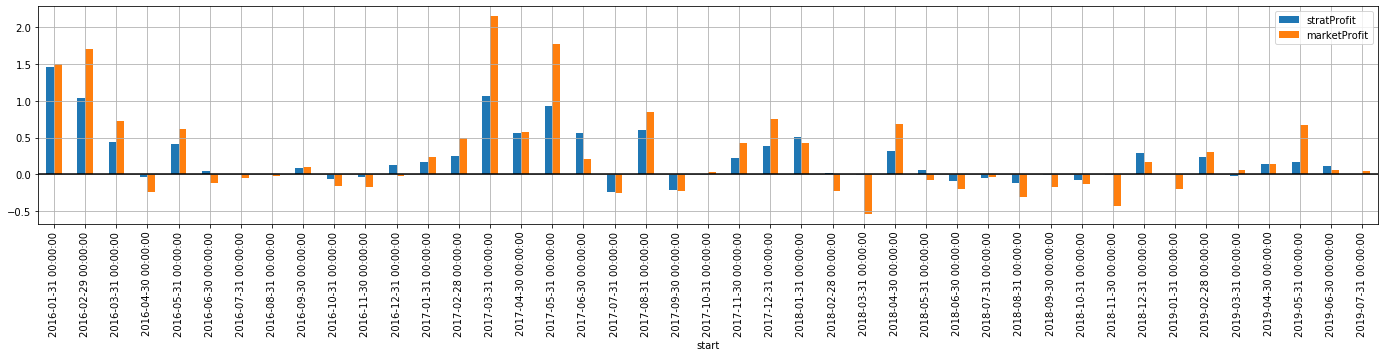

In [297]:
profits[['stratProfit', 'marketProfit']].plot.bar(figsize=(24,4))
plt.axhline(0, c='black', lw=1.5)
plt.grid();